In [1]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import json

In [2]:
testdata=pd.read_csv('../data/invest_cleaned.csv')
testdata

,company_name,company_lng,company_lat,invested_company_name,invested_company_lng,invested_company_lat,company_registered_address,company_area_code,company_industry_code,invested_company_registered_address,invested_company_area_code,invested_company_industry_code,stock_percentage,should_capi,invest_regi_capi
0,百色市红日房地产开发有限责任公司,106.616688,23.904246,那坡县红日投资实业有限公司,105.840914,23.398263,百色市城北二路１４号,451000,K7010,那坡县城厢镇百马路157-1号,451026,L7212,1.0000,1000.00,1000万
1,佛山市卓信房地产投资发展有限公司,113.214618,23.016514,佛山市恒轮置业投资有限公司,113.028711,22.838297,佛山市南海区桂城街道文华北路23号星晖园综合办公楼五层之一(住所申报),440605,K7010,佛山市南海区九江镇奇山开发区奇腾路9号822室,440605,K7000,0.0550,19.25,350万元人民币
2,重庆绿色产业有限公司,106.468517,29.569209,重庆天演生物技术有限责任公司,106.469771,29.573659,重庆市沙坪坝区沙南街43号,500106,A0190,沙坪坝区沙南街43号7楼,500106,C2761,0.3576,89.40,250万元
3,内蒙古风盛新能源有限公司,111.684023,40.829470,内蒙古金杰科技股份有限公司,109.895208,40.637444,内蒙古自治区呼和浩特市赛罕区新华大街万达广场写字楼A座1306室,150105,D4400,内蒙古自治区包头市白云鄂博矿区稀土路2号蒙古王府旁203房间B,150200,C3400,NaN,NaN,9179万
4,四川诚翔服饰集团有限公司,104.158521,30.635285,四川诚翔纺织品有限公司,104.649891,30.510454,成都市成华区万科北街18号7栋1单元1层1号,510000,F5132,成都市成华区青龙乡站东村四组1幢2层B129号,510108,F5131,0.7000,2100.00,3000万元人民币
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322525,中海企业发展集团有限公司,113.959075,22.539179,宁波中海海富房地产有限公司,121.556526,29.814642,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,浙江省宁波市鄞州区首南街道天童南路555号805室-3,330212,K7010,1.0000,2000.00,2000万元人民币
322526,中海企业发展集团有限公司,113.959075,22.539179,太原中海仲兴房地产开发有限公司,112.536057,37.861494,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,太原市万柏林区晋祠路一段8号9幢1层0101号,140100,K7010,1.0000,5000.00,5000万元人民币
322527,中海企业发展集团有限公司,113.959075,22.539179,北京安泰兴业置业有限公司,116.186529,39.919897,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,北京市石景山区古城西路６６号院１号楼１０１,110107,K7010,1.0000,1000.00,1000万元人民币
322528,中海企业发展集团有限公司,113.959075,22.539179,北京中海地产有限公司,116.807322,40.364279,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,北京市密云区西大桥路69号密云区投资促进局办公楼316室—518,110228,K7010,1.0000,5000.00,5000万元人民币


In [3]:
testdata=testdata[['company_area_code','invested_company_area_code']]
testdata

,company_area_code,invested_company_area_code
0,451000,451026
1,440605,440605
2,500106,500106
3,150105,150200
4,510000,510108
...,...,...
323446,440300,330212
323447,440300,140100
323448,440300,110107
323449,440300,110228


# population & GDP（36 main cities）

In [3]:
city=['SH','BJ','Shenzhen','Guangzhou','CQ','Chengdu','Wuhan','Hangzhou','TJ','Nanjing',
      '宁波','青岛','郑州','长沙','济南','合肥','福州','Xi\'an','大连',
      '昆明','沈阳','Xiamen','长春','Shijiazhuang','南昌','Harbin','Nanning','贵阳',
      '太原','乌鲁木齐','兰州','呼和浩特','银川','海口','西宁','拉萨']
citycode=[31,11,4403,4401,50,5101,4201,3301,12,3201,3302,3702,4101,4301,3701,3401,3501,6101,2102,
          5301,2101,3502,2201,1301,3601,2301,4501,5201,1401,6501,6201,1501,6401,4601,6301,5401]
citycode=[str(i) for i in citycode]

In [4]:
popul2019=[1469.3,1397.4,550.71,953.72,3416.29,1500.07,906.4,795.37,1108.18,709.82,608.47,831.07,881.6,738.24,796.74,770.44,
           710.09,956.74,598.69,578.46,756.4,261.1,753.8,1052.39,536,951.34,781.97,427.83,383.5,226.82,331.92,248.74,199.57,
           182.89,209.37,55.88]
gdp2019=[37987.6,35445.1,26927,23629,23605.8,17013,16223,15373,14055.5,14031,11985,11741,11590,11574,9443,9409,9392,9321,7002,
         6476,6470,5995,5904,5810,5596,5249,4507,4040,4029,3413,2837,2791,1897,1672,1328,618]


In [68]:
popul2018=[1462.38,1375.8,454.7,927.69,3403.64,1476.05,883.73,774.1,1081.63,696.94,602.96,817.79,863.9,728.86,655.9,757.96,702.66,
           986.87,595.21,571.67,745.99,242.53,751.29,981.6,531.88,951.54,770.82,418.45,376.72,222.26,328.48,245.85,193.42,177.61,
           207.38,55.44]
gdp2018=[36011.8,33106,24221.98,22859.35,21588.8,15342.77,14847.29,13509.15,13362.9,12820.4,10745.46,12001.52,10143.32,11003.41,
         7856.56,7822.91,7856.81,8349.86,7668.48,5206.9,6292.4,4791.41,7175.71,6082.62,5274.67,6300.48,4026.91,3798.45,3884.48,
         3099.77,2732.94,2903.5,1901.48,1510.51,1286.41,540.78]

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize as op
from sklearn.metrics import r2_score
plt.rc('font',family='Arial')

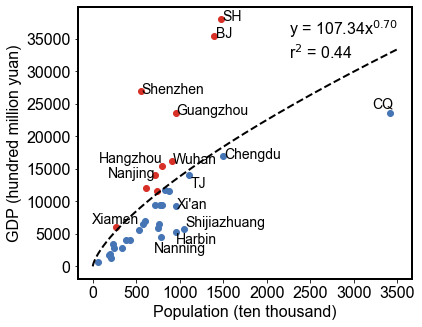

In [70]:
plt.figure(figsize=[6,5])
plt.ylabel('GDP (hundred million yuan)',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2019, gdp2019)[0]
x = np.arange(0, 3500)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(gdp2019)):
    if gdp2019[i] <= fund(popul2019[i], a, b):
        plt.scatter(popul2019[i],gdp2019[i],color=['#4575b4'])
    else:
        plt.scatter(popul2019[i],gdp2019[i],color=['#d73027'])
        
for i in ['SH','BJ','Shenzhen','Guangzhou','Chengdu','Wuhan','Xi\'an']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['TJ','Harbin']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['Nanjing']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center',horizontalalignment='right')
for i in ['Hangzhou','CQ']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Shijiazhuang']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*0.98, i, fontsize=14,verticalalignment='bottom')
for i in ['Nanning']:
    plt.text(popul2019[city.index(i)]*0.9, gdp2019[city.index(i)]*0.85, i, fontsize=14,verticalalignment='top')
for i in ['Xiamen']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='center')

pred=[]
for i in popul2019:
    pred.append(a * i ** b)
r2=r2_score(gdp2019, pred)
plt.text(x=2250,y=32000, s='y = %.2fx$^{%.2f}$\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

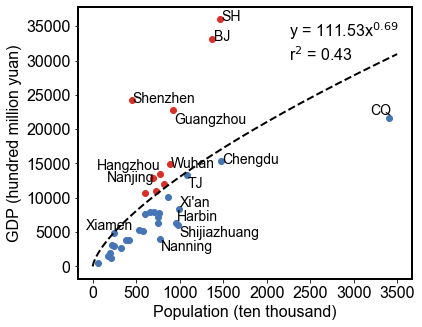

In [49]:
plt.figure(figsize=[6,5])
plt.ylabel('GDP (hundred million yuan)',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2018, gdp2018)[0]
x = np.arange(0, 3500)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(gdp2018)):
    if gdp2018[i] <= fund(popul2018[i], a, b):
        plt.scatter(popul2018[i],gdp2018[i],color=['#4575b4'])
    else:
        plt.scatter(popul2018[i],gdp2018[i],color=['#d73027'])

for i in ['SH','BJ','Shenzhen','Chengdu','Wuhan']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['TJ','Shijiazhuang','Guangzhou','Nanning']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['Nanjing']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center',horizontalalignment='right')
for i in ['Hangzhou','CQ']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Harbin','Xi\'an']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*0.98, i, fontsize=14,verticalalignment='bottom')
for i in ['Xiamen']:
    plt.text(popul2018[city.index(i)]*0.8, gdp2018[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='center')

pred=[]
for i in popul2018:
    pred.append(a * i ** b)
r2=r2_score(gdp2018, pred)
plt.text(x=2250,y=30000, s='y = %.2fx$^{%.2f}$\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
        
plt.show()

In [52]:
# delete CQ

index=city.index('CQ')
city.pop(index)
gdp2019.pop(index)
popul2019.pop(index)
gdp2018.pop(index)
popul2018.pop(index)

3403.64

In [14]:
# delete Shenzhen

# index2=city.index('Shenzhen')
# city.pop(index2)
# gdp2019.pop(index2)
# popul2019.pop(index2)
# gdp2018.pop(index2)
# popul2018.pop(index2)

454.7

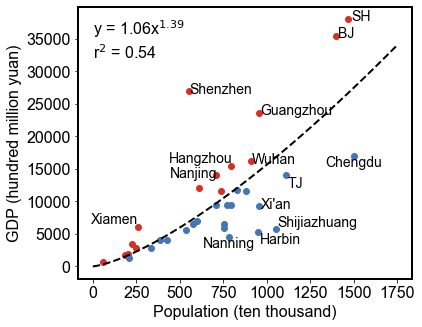

In [57]:
plt.figure(figsize=[6,5])
plt.ylabel('GDP (hundred million yuan)',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2019, gdp2019)[0]
x = np.arange(0, 1750)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(gdp2019)):
    if gdp2019[i] <= fund(popul2019[i], a, b):
        plt.scatter(popul2019[i],gdp2019[i],color=['#4575b4'])
    else:
        plt.scatter(popul2019[i],gdp2019[i],color=['#d73027'])

for i in ['SH','BJ','Guangzhou','Wuhan','Xi\'an','Shenzhen']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['TJ','Harbin']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['Nanjing']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center',horizontalalignment='right')
for i in ['Hangzhou','Xiamen']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Shijiazhuang']:
    plt.text(popul2019[city.index(i)]*1.01, gdp2019[city.index(i)]*0.98, i, fontsize=14,verticalalignment='bottom')
for i in ['Nanning','Chengdu']:
    plt.text(popul2019[city.index(i)], gdp2019[city.index(i)], i, fontsize=14,verticalalignment='top',horizontalalignment='center')

pred=[]
for i in popul2019:
    pred.append(a * i ** b)
r2=r2_score(gdp2019, pred)

plt.text(x=0,y=32000, s='y = %.2fx$^{%.2f}$\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
        
plt.show()

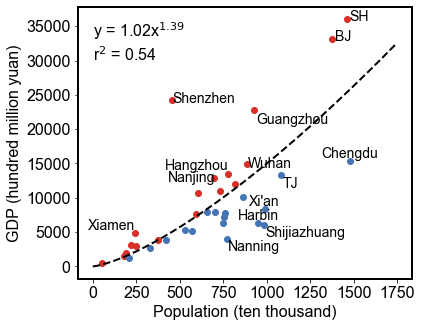

In [58]:
plt.figure(figsize=[6,5])
plt.ylabel('GDP (hundred million yuan)',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2018, gdp2018)[0]
x = np.arange(0, 1750)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(gdp2018)):
    if gdp2018[i] <= fund(popul2018[i], a, b):
        plt.scatter(popul2018[i],gdp2018[i],color=['#4575b4'])
    else:
        plt.scatter(popul2018[i],gdp2018[i],color=['#d73027'])

for i in ['SH','BJ','Wuhan','Shenzhen']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['TJ','Shijiazhuang','Guangzhou','Nanning']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['Nanjing']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center',horizontalalignment='right')
for i in ['Hangzhou','Xiamen']:
    plt.text(popul2018[city.index(i)]*1.01, gdp2018[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Harbin','Xi\'an','Chengdu']:
    plt.text(popul2018[city.index(i)], gdp2018[city.index(i)], i, fontsize=14,verticalalignment='bottom',horizontalalignment='center')

pred=[]
for i in popul2018:
    pred.append(a * i ** b)
r2=r2_score(gdp2018, pred)

plt.text(x=0,y=30000, s='y = %.2fx$^{%.2f}$\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
        
plt.show()

# population & investment（36 main cities in 2021）

In [5]:
city=['SH','BJ','Shenzhen','Guangzhou','CQ','Chengdu','Wuhan','Hangzhou','TJ','Nanjing',
      'Ningbo','青岛','郑州','长沙','济南','合肥','福州','Xi\'an','大连',
      '昆明','沈阳','Xiamen','长春','Shijiazhuang','南昌','Harbin','Nanning','贵阳',
      '太原','乌鲁木齐','兰州','呼和浩特','银川','海口','西宁','拉萨']
citycode=[31,11,4403,4401,50,5101,4201,3301,12,3201,3302,3702,4101,4301,3701,3401,3501,6101,2102,
          5301,2101,3502,2201,1301,3601,2301,4501,5201,1401,6501,6201,1501,6401,4601,6301,5401]
citycode=[str(i) for i in citycode]

In [6]:
popul2021=[1492.92,1413.5491,556.39,1011.5306,3414.66,1556.18,934.1,834.54,1151.56,733.7258,618.33,846.2,911.45,760.04,816.61,
           792.67,723.3587,999.45,603.6,588.6,765.4,282.8052,851.7,1120.47,540.38,943.2,800.9409,444.83,395.11,234.82,336.28,
           255.1,209.77,216.4452,213.1471,57.84]

In [7]:
lst1=list(testdata['company_area_code'].astype(str))
lst2=list(testdata['invested_company_area_code'].astype(str))
I_out=[]
I_in=[]
for i in citycode:
    num=0
    a=len(i)
    for j in lst1:
        if i==j[:a]:
            num+=1
    I_out.append(num)
for i in citycode:
    num=0
    a=len(i)
    for j in lst2:
        if i==j[:a]:
            num+=1
    I_in.append(num)

print(I_out)
print(I_in)

[33858, 32951, 28456, 8929, 5698, 6223, 3175, 9287, 2907, 4801, 5496, 4506, 3636, 4302, 3357, 2149, 1938, 2324, 3359, 1721, 3446, 3679, 654, 1384, 1354, 1926, 1631, 1594, 801, 641, 1060, 589, 73, 369, 148, 584]
[32287, 23937, 26360, 9002, 6187, 6574, 3066, 10347, 2132, 4828, 5814, 4607, 3863, 4840, 3839, 2289, 1971, 3220, 3505, 2196, 3688, 3716, 321, 1303, 1506, 2049, 1877, 1848, 812, 351, 1251, 687, 72, 263, 183, 239]


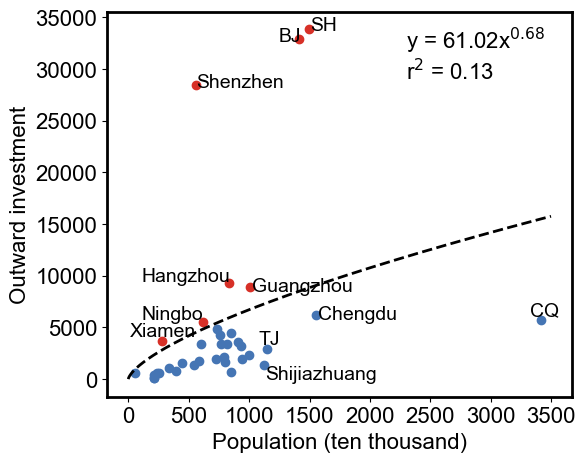

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize as op

plt.figure(figsize=[6,5])
plt.ylabel('Outward investment',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2021, I_out)[0]
x = np.arange(0, 3500)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(I_out)):
    if I_out[i] <= fund(popul2021[i], a, b):
        plt.scatter(popul2021[i],I_out[i],color=['#4575b4'])
    else:
        plt.scatter(popul2021[i],I_out[i],color=['#d73027'])
        
for i in ['SH','Shenzhen','Guangzhou','Chengdu']:
    plt.text(popul2021[city.index(i)]*1.01, I_out[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Shijiazhuang']:
    plt.text(popul2021[city.index(i)]*1.01, I_out[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['BJ','Hangzhou','Ningbo']:
    plt.text(popul2021[city.index(i)]*1.01, I_out[city.index(i)]*0.98, i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Xiamen','TJ','CQ']:
    plt.text(popul2021[city.index(i)]*1.01, I_out[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='center')

pred=[]
for i in popul2021:
    pred.append(a * i ** b)
r2=r2_score(I_out, pred)
plt.text(x=2300,y=29000, s='y = %.2fx$^{%.2f}$\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

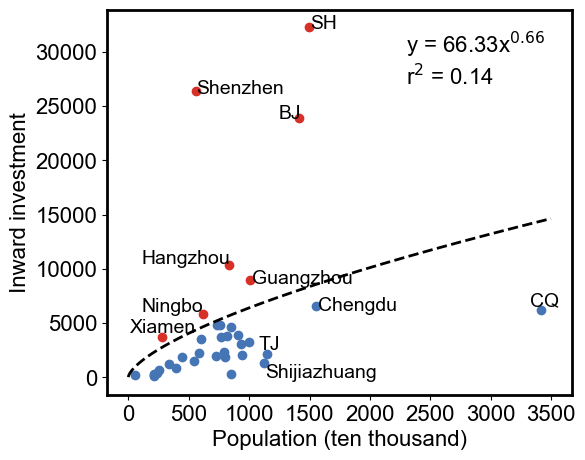

In [11]:
plt.figure(figsize=[6,5])
plt.ylabel('Inward investment',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2021, I_in)[0]
x = np.arange(0, 3500)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(I_in)):
    if I_in[i] <= fund(popul2021[i], a, b):
        plt.scatter(popul2021[i],I_in[i],color=['#4575b4'])
    else:
        plt.scatter(popul2021[i],I_in[i],color=['#d73027'])
        
for i in ['SH','Shenzhen','Guangzhou','Chengdu']:
    plt.text(popul2021[city.index(i)]*1.01, I_in[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Shijiazhuang']:
    plt.text(popul2021[city.index(i)]*1.01, I_in[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['BJ','Hangzhou','Ningbo']:
    plt.text(popul2021[city.index(i)]*1.01, I_in[city.index(i)]*0.98, i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Xiamen','TJ','CQ']:
    plt.text(popul2021[city.index(i)]*1.01, I_in[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='center')

pred=[]
for i in popul2021:
    pred.append(a * i ** b)
r2=r2_score(I_in, pred)
plt.text(x=2300,y=27000, s='y = %.2fx$^{%.2f}$\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

In [12]:
# delete CQ

index=city.index('CQ')
city.pop(index)
I_out.pop(index)
I_in.pop(index)
popul2021.pop(index)

3414.66

In [13]:
# delete Shenzhen

index2=city.index('Shenzhen')
city.pop(index2)
I_out.pop(index2)
I_in.pop(index2)
popul2021.pop(index2)

556.39

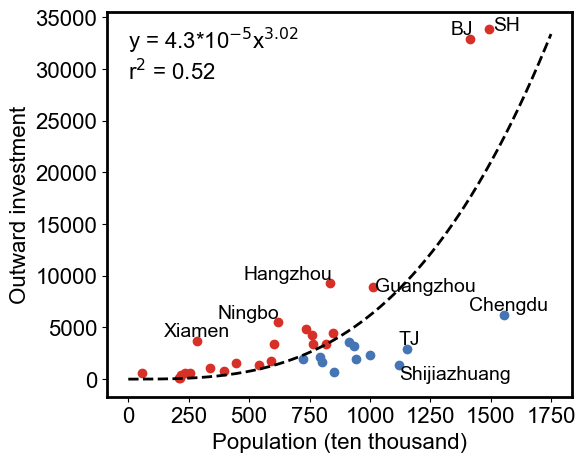

In [14]:
plt.figure(figsize=[6,5])
plt.ylabel('Outward investment',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2021, I_out)[0]
x = np.arange(0, 1750)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(I_out)):
    if I_out[i] <= fund(popul2021[i], a, b):
        plt.scatter(popul2021[i],I_out[i],color=['#4575b4'])
    else:
        plt.scatter(popul2021[i],I_out[i],color=['#d73027'])
        
for i in ['SH','Guangzhou']:
    plt.text(popul2021[city.index(i)]*1.01, I_out[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Shijiazhuang']:
    plt.text(popul2021[city.index(i)], I_out[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['BJ','Hangzhou','Ningbo']:
    plt.text(popul2021[city.index(i)]*1.01, I_out[city.index(i)], i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Xiamen','TJ','Chengdu']:
    plt.text(popul2021[city.index(i)]*1.01, I_out[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='center')

pred=[]
for i in popul2021:
    pred.append(a * i ** b)
r2=r2_score(I_out, pred)
# plt.text(x=0,y=30000, s='y = %fx^%.2f\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)
plt.text(x=0,y=29000, s='y = 4.3*10$^{-5}$x$^{%.2f}$\nr$^2$ = %.2f'%(b,r2), fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

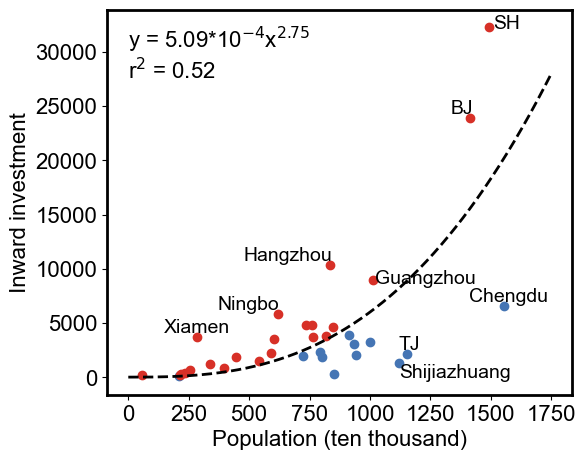

In [15]:
plt.figure(figsize=[6,5])
plt.ylabel('Inward investment',fontsize=16)
plt.xlabel('Population (ten thousand)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def fund(x, a, b):
    return a * x ** b

a, b = curve_fit(fund, popul2021, I_in)[0]
x = np.arange(0, 1750)
y = a * x ** b
plt.plot(x, y,color='black',linestyle='dashed',linewidth=2)

for i in range(len(I_in)):
    if I_in[i] <= fund(popul2021[i], a, b):
        plt.scatter(popul2021[i],I_in[i],color=['#4575b4'])
    else:
        plt.scatter(popul2021[i],I_in[i],color=['#d73027'])

for i in ['SH','Guangzhou']:
    plt.text(popul2021[city.index(i)]*1.01, I_in[city.index(i)]*1.01, i, fontsize=14,verticalalignment='center')
for i in ['Shijiazhuang']:
    plt.text(popul2021[city.index(i)], I_in[city.index(i)]*0.98, i, fontsize=14,verticalalignment='top')
for i in ['BJ','Hangzhou','Ningbo']:
    plt.text(popul2021[city.index(i)]*1.01, I_in[city.index(i)], i, fontsize=14,verticalalignment='bottom',horizontalalignment='right')
for i in ['Xiamen','TJ','Chengdu']:
    plt.text(popul2021[city.index(i)]*1.01, I_in[city.index(i)]*1.01, i, fontsize=14,verticalalignment='bottom',horizontalalignment='center')

pred=[]
for i in popul2021:
    pred.append(a * i ** b)
r2=r2_score(I_in, pred)
# plt.text(x=0,y=27500, s='y = %fx^%.2f\nr$^2$ = %.2f'%(a,b,r2), fontsize=16)
plt.text(x=0,y=27500, s='y = 5.09*10$^{-4}$x$^{%.2f}$\nr$^2$ = %.2f'%(b,r2), fontsize=16)

bwith = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
        
plt.show()